<a href="https://colab.research.google.com/github/Vagarh/IUdigital/blob/main/ML_Prediccion_Protein_Family.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Preparando el entorno de trabajo

In [42]:
## Cargando las librerias

## Manupulacion
import pandas as pd
import numpy as np

## Vizualizacion
from matplotlib import pyplot as plt
import seaborn as sns

## Machine Learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## --------------

# Import Datasets
df_seq = pd.read_csv('/content/pdb_data_seq.csv')
df_char = pd.read_csv('/content/pdb_data_no_dups.csv')

print('Datasets have been loaded...')

Datasets have been loaded...


# 2.Procesamiento de datos y filtrado

In [43]:
# 2). ----- FILTRAR Y PROCESAS EL DATA SETT ------

# Filtrar solo las proteinas
protein_char = df_char[df_char.macromoleculeType == 'Protein']
protein_seq = df_seq[df_seq.macromoleculeType == 'Protein']


EL analisis comprende el uso de dos data sett denominados "PROTEIN_CHAR" Y "PROTEIN_SEP".Con los datos cargados en dos dataframes separados de pandas, es necesario realizar un filtro, una proyección y una unión para obtener los datos juntos, la libreria pandas ofrece una forma de realizar estos comandos similares a SQL.

# Protein_Char

In [44]:
protein_char.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
5,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
7,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
8,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0


In [45]:
protein_char.describe(include="all")

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
count,127798,127797,127798,127798,127798.000000,117008.000000,1.277980e+05,87667,88638.000000,114341.000000,114362.000000,108296,95902.000000,105931.000000
unique,127387,4468,29,1,NaN,NaN,NaN,526,NaN,NaN,NaN,84469,NaN,NaN
top,1UJQ,HYDROLASE,X-RAY DIFFRACTION,Protein,NaN,NaN,NaN,"VAPOR DIFFUSION, HANGING DROP",NaN,NaN,NaN,pH 7.5,NaN,NaN
freq,4,20425,115438,127798,NaN,NaN,NaN,48893,NaN,NaN,NaN,346,NaN,NaN
mean,NaN,NaN,NaN,NaN,721.049046,2.208678,8.955848e+04,NaN,291.000731,2.652620,51.113914,NaN,6.786939,2009.044746
std,NaN,NaN,NaN,NaN,1741.791584,1.339638,4.690485e+05,NaN,8.764264,0.687323,10.011235,NaN,1.307179,8.521400
min,NaN,NaN,NaN,NaN,3.000000,0.480000,4.535500e+02,NaN,4.000000,0.000000,0.000000,NaN,0.000000,201.000000
25%,NaN,NaN,NaN,NaN,237.000000,1.780000,2.672429e+04,NaN,290.000000,2.210000,44.160000,NaN,6.000000,2005.000000
50%,NaN,NaN,NaN,NaN,416.000000,2.040000,4.706000e+04,NaN,293.000000,2.480000,50.200000,NaN,7.000000,2010.000000
75%,NaN,NaN,NaN,NaN,800.000000,2.490000,9.102404e+04,NaN,295.000000,2.890000,57.320000,NaN,7.500000,2014.000000


In [46]:
protein_char.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear'],
      dtype='object')

In [47]:
protein_char.dtypes

structureId                  object
classification               object
experimentalTechnique        object
macromoleculeType            object
residueCount                  int64
resolution                  float64
structureMolecularWeight    float64
crystallizationMethod        object
crystallizationTempK        float64
densityMatthews             float64
densityPercentSol           float64
pdbxDetails                  object
phValue                     float64
publicationYear             float64
dtype: object

In [48]:
protein_char.isnull().sum()

structureId                     0
classification                  1
experimentalTechnique           0
macromoleculeType               0
residueCount                    0
resolution                  10790
structureMolecularWeight        0
crystallizationMethod       40131
crystallizationTempK        39160
densityMatthews             13457
densityPercentSol           13436
pdbxDetails                 19502
phValue                     31896
publicationYear             21867
dtype: int64

In [49]:
# Seleccionando variables a unir en los dos data set
protein_char = protein_char[['structureId','classification','residueCount', 'resolution',
       'structureMolecularWeight','crystallizationTempK', 'densityMatthews', 'densityPercentSol', 'phValue']]
protein_seq = protein_seq[['structureId','sequence']]
protein_seq.head()

,structureId,sequence
4,101M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
7,102L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
8,102M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
11,103L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
12,103M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [50]:
protein_char.head()

,structureId,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue
2,101M,OXYGEN TRANSPORT,154,2.07,18112.80,NaN,3.09,60.20,9.0
4,102L,HYDROLASE(O-GLYCOSYL),165,1.74,18926.61,NaN,2.75,55.28,NaN
5,102M,OXYGEN TRANSPORT,154,1.84,18010.64,NaN,3.09,60.20,9.0
7,103L,HYDROLASE(O-GLYCOSYL),167,1.90,19092.72,NaN,2.70,54.46,NaN
8,103M,OXYGEN TRANSPORT,154,2.07,18093.78,NaN,3.09,60.30,9.0


In [51]:
# Uniendo ambos data set en un nuevo mas esturcutrado
model_f = protein_char.set_index('structureId').join(protein_seq.set_index('structureId'))
model_f.head()

,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,sequence
structureId,,,,,,,,,
101M,OXYGEN TRANSPORT,154,2.07,18112.80,NaN,3.09,60.20,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
102L,HYDROLASE(O-GLYCOSYL),165,1.74,18926.61,NaN,2.75,55.28,NaN,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
102M,OXYGEN TRANSPORT,154,1.84,18010.64,NaN,3.09,60.20,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
103L,HYDROLASE(O-GLYCOSYL),167,1.90,19092.72,NaN,2.70,54.46,NaN,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
103M,OXYGEN TRANSPORT,154,2.07,18093.78,NaN,3.09,60.30,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [52]:
model_f.describe(include="all")

,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,sequence
count,346324,346325.000000,330232.000000,3.463250e+05,243934.000000,307481.000000,307615.000000,259130.000000,346322
unique,4468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89083
top,HYDROLASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PIVQNLQGQMVHQAISPRTLNAWVKVVEEKAFSPEVIPMFSALSEG...
freq,46336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2580
mean,NaN,4708.536765,2.716206,5.516918e+05,291.243141,2.760855,52.817512,6.801273,NaN
std,NaN,26484.160063,3.083736,3.129940e+06,8.498793,0.738698,10.135556,1.344769,NaN
min,NaN,3.000000,0.480000,4.535500e+02,4.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,398.000000,1.900000,4.541398e+04,291.000000,2.280000,45.820000,6.000000,NaN
50%,NaN,856.000000,2.300000,9.703276e+04,293.000000,2.570000,52.000000,7.000000,NaN
75%,NaN,1976.000000,2.800000,2.253119e+05,295.000000,3.030000,59.380000,7.500000,NaN


In [53]:
model_f.dtypes

classification               object
residueCount                  int64
resolution                  float64
structureMolecularWeight    float64
crystallizationTempK        float64
densityMatthews             float64
densityPercentSol           float64
phValue                     float64
sequence                     object
dtype: object

In [54]:
model_f.shape

(346325, 9)

In [55]:
print('%d es el numero de finlas unidaas (join) en ambos data set' %model_f.shape[0])

346325 es el numero de finlas unidaas (join) en ambos data set


In [56]:
# Validando datos nulos
model_f.isnull().sum()

classification                   1
residueCount                     0
resolution                   16093
structureMolecularWeight         0
crystallizationTempK        102391
densityMatthews              38844
densityPercentSol            38710
phValue                      87195
sequence                         3
dtype: int64

In [59]:
# Drop rows con valores perdidos
model_f = model_f.dropna()
print('%d es el numero de proteinas que tienen una clasificacion de familia y secuencia' %model_f.shape[0])

214106 es el numero de proteinas que tienen una clasificacion de familia y secuencia


In [62]:
# Look at classification type counts
counts = model_f.classification.value_counts()
print(counts)


HYDROLASE                               29726
TRANSFERASE                             24338
OXIDOREDUCTASE                          22578
IMMUNE SYSTEM                           11087
HYDROLASE/HYDROLASE INHIBITOR            9569
                                        ...  
DYE-BINDING PROTEIN                         1
CHAPERONE REGULATOR                         1
pyridoxal phosphate binding                 1
IMMUNE SYSTEM, LIPID BINDING PROTEIN        1
lipid transport/activator                   1
Name: classification, Length: 2458, dtype: int64


<ipython-input-61-2baad1cf75d6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(counts, hist = False, color = 'purple')


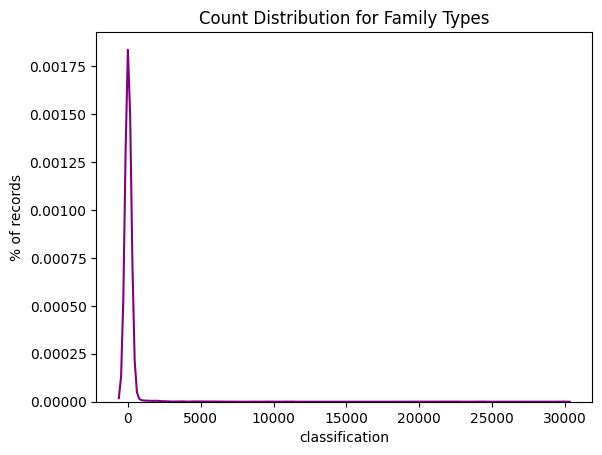

In [61]:
#plot counts
plt.figure()
sns.distplot(counts, hist = False, color = 'purple')
plt.title('Count Distribution for Family Types')
plt.ylabel('% of records')
plt.show()